In [59]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [95]:
import pandas as pd

In [96]:
df = pd.read_csv("mnist.csv")

In [100]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = df.drop(columns=['label'])
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [102]:
X_train.shape # 3d array

(33600, 784)

In [103]:
X_test.shape

(8400, 784)

In [104]:
import numpy as np
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [108]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1][1].reshape(28,28))

KeyError: 1

In [29]:
### Scaling faster the calculation of parameter in ANN

In [56]:
np.max(X_train), np.min(X_train)

(255, 0)

In [65]:
X_train = X_train/255
y_train = y_train/255

In [39]:
np.max(X_train), np.min(X_train), np.round(np.mean(X_train),2)

(1.0, 0.0, 0.13)

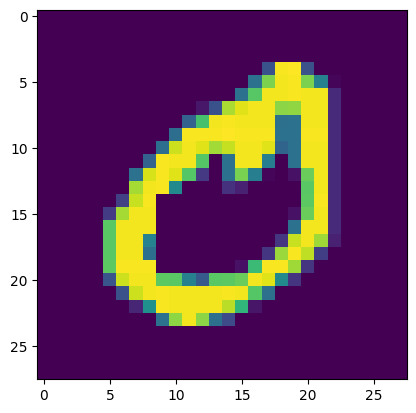

In [70]:
import matplotlib.pyplot as plt
plt.imshow(X_train[21])

In [71]:
# converting 3D tf to 1d tf by flatten
model = Sequential() 

model.add(Flatten(input_shape=(28,28))) # 28x28 = 784, 
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation ="softmax"))  #softmax is used for multi classificaion & sigmod is used for bi-clasification

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam") 
#spare_catagorical_crossentropy = not needed to onehotencoding

In [43]:
model.fit(X_train,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0067 - val_loss: 1.0067e-05
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 5.1656e-06 - val_loss: 1.9252e-06
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2947e-06 - val_loss: 6.5323e-07
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 4.5599e-07 - val_loss: 2.5100e-07
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.7751e-07 - val_loss: 1.0402e-07
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 7.4161e-08 - val_loss: 4.7712e-08
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 3.2345e-08 - val_loss: 2.0841e-08
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4116e-08 - val_loss: 1.0093e-08
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 6.6484e-09 - val_loss: 5.0664e-09
Epoch 10/10
15

In [44]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [45]:
y_pred = y_prob.argmax(axis=1)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score=(y_test, y_pred)

In [ ]:
###############

In [47]:
model = Sequential() 

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))         # 28x28 = 784, 
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation ="softmax"))  #softmax is used for multi classificaion & sigmod is used for bi-clasification

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=['accuracy']) 
#spare_catagorical_crossentropy = not needed to onehotencoding

In [86]:
history= model.fit(X_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 2.9802e-11 - accuracy: 0.0985 - val_loss: 1.5895e-10 - val_accuracy: 0.0995
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 2.7319e-11 - accuracy: 0.0985 - val_loss: 1.5895e-10 - val_accuracy: 0.0995
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 2.4835e-11 - accuracy: 0.0985 - val_loss: 1.5895e-10 - val_accuracy: 0.0995
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 2.2352e-11 - accuracy: 0.0985 - val_loss: 1.4901e-10 - val_accuracy: 0.0995
Epoch 5/25
1500/1500 [==============================] - 7s 4ms/step - loss: 2.2352e-11 - accuracy: 0.0985 - val_loss: 1.2914e-10 - val_accuracy: 0.0995
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 1.9868e-11 - accuracy: 0.0985 - val_loss: 1.1921e-10 - val_accuracy: 0.0995
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 1.7385e-11 -

In [87]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [88]:
y_pred = y_prob.argmax(axis=1)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.098

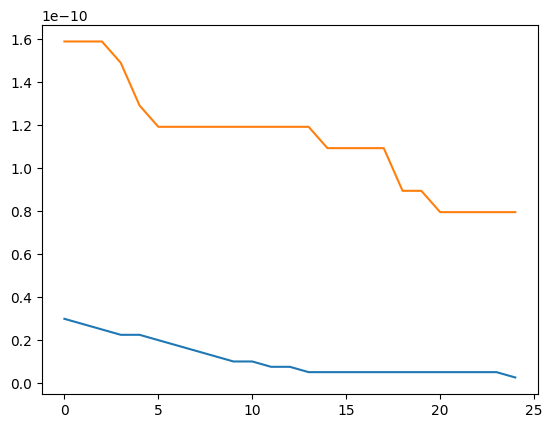

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

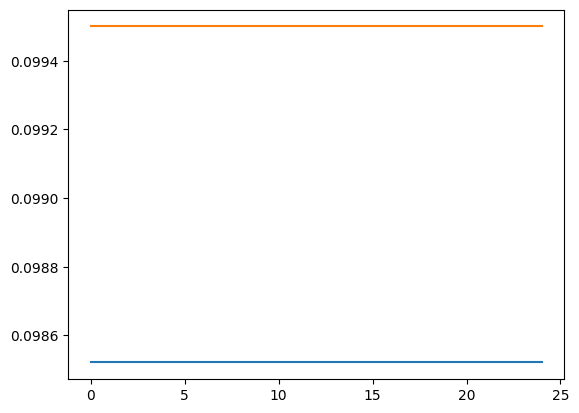

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

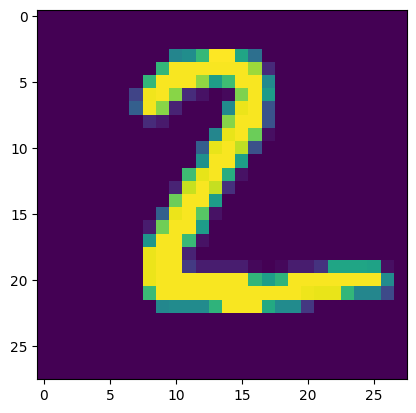

In [92]:
plt.imshow(X_test[1])

In [93]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 33ms/step


array([0], dtype=int64)